313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


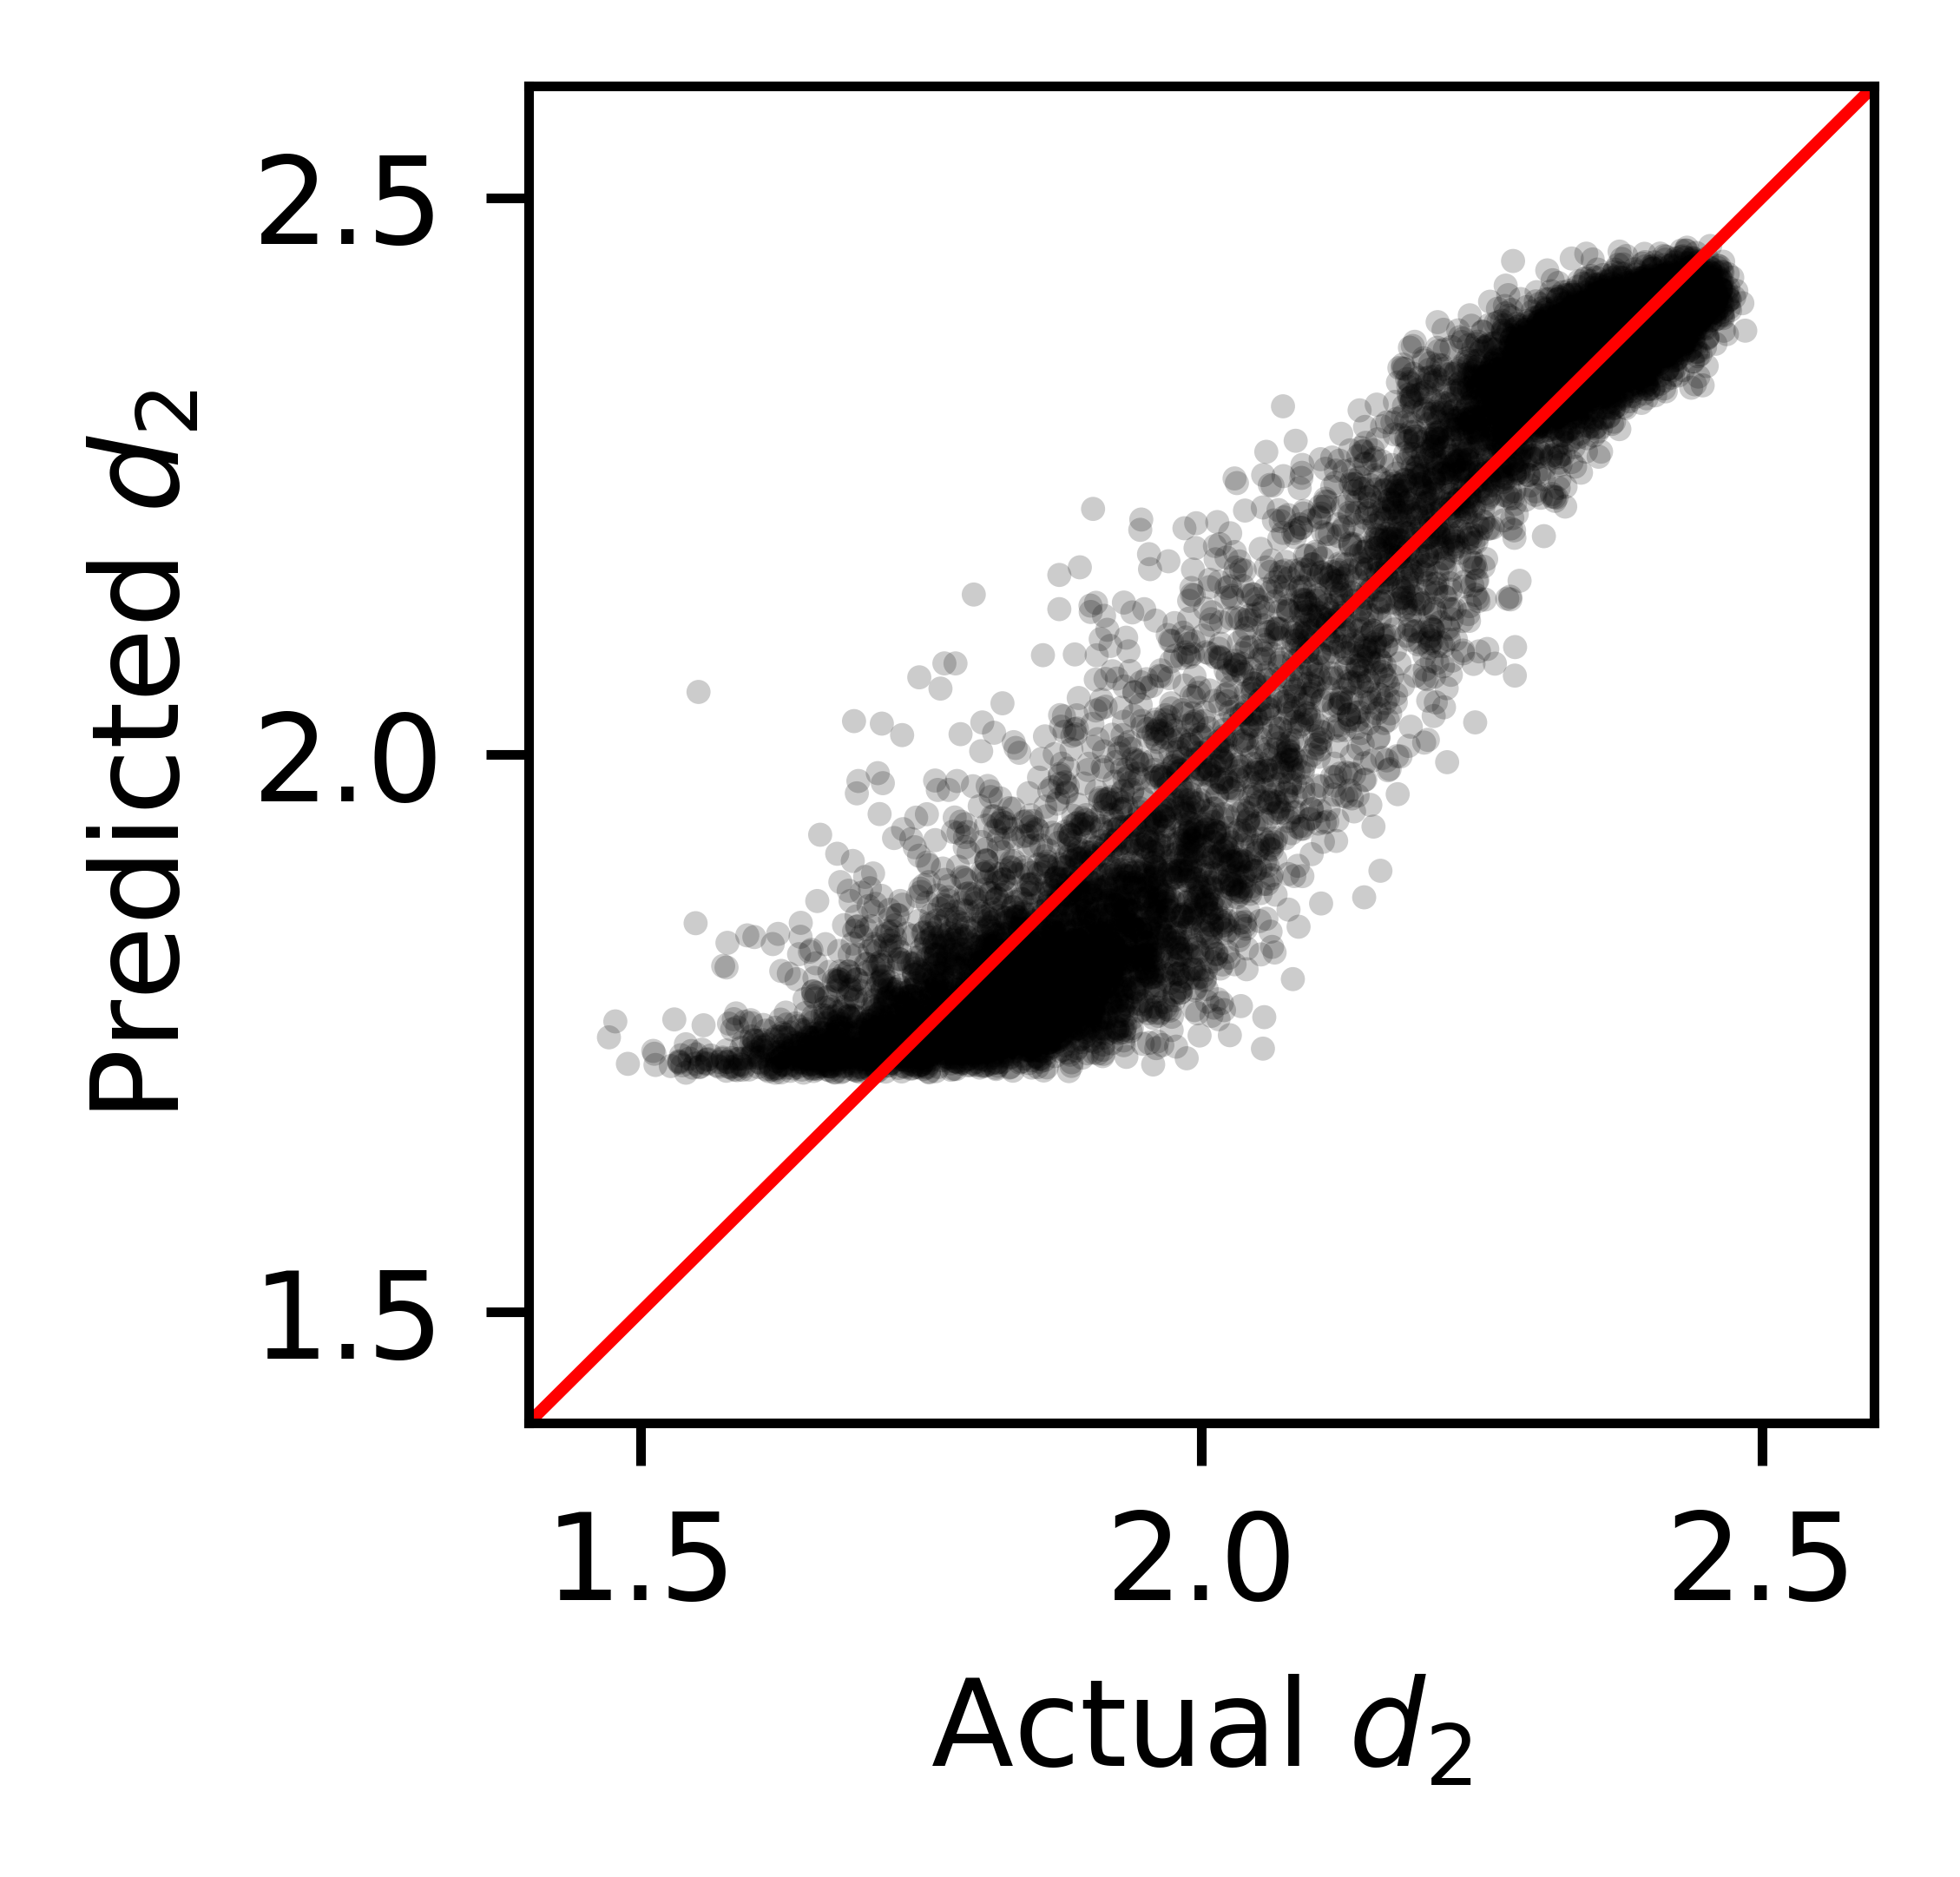

0.9194238293676695

In [1]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000
# Define paths and parameters

dataset_path = "/Users/braydennoh/Research/flocCNN/datablur"

IMG_SIZE = (128, 128)  # Image size used in training

# Load the trained model
model = load_model("/Users/braydennoh/Research/flocCNN/datablur.h5")

# Function to load test data
def load_test_data(dataset_path, num_samples=100):
    images = []
    labels = []
    folders = sorted(os.listdir(dataset_path))[:num_samples]
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue

        # Load label
        label_file = os.path.join(folder_path, "correlation_dimension.txt")
        with open(label_file, "r") as f:
            for line in f:
                if "Correlation dimension" in line:
                    d2_3D = float(line.split(":")[1].strip())
                    break

        # Load a single image for simplicity (e.g., xy_projection.bmp)
        img_path = os.path.join(folder_path, "xy_projection.bmp")
        img = load_img(img_path, target_size=IMG_SIZE, color_mode="grayscale")
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(d2_3D)

    return np.array(images), np.array(labels)

# Load test data
test_images, test_labels = load_test_data(dataset_path, num_samples=30000)

# Add batch dimension to images
test_images = test_images[..., np.newaxis]

# Predict fractal dimensions
predictions = model.predict(test_images)
predicted_d2_3D = predictions.flatten()  # Flatten predictions for plotting

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.scatter(test_labels, predicted_d2_3D, alpha=0.2, s=4, color='black', edgecolor='none')
plt.plot([min(test_labels)-1, max(test_labels)+1], [min(test_labels)-1, max(test_labels)+1], color="red", linestyle="-", lw=1)
plt.xlabel(r"Actual $d_2$")
plt.ylabel(r"Predicted $d_2$")
plt.xlim([1.4, 2.6])
plt.ylim([1.4, 2.6])
plt.xticks([1.5, 2.0, 2.5])
plt.yticks([1.5, 2.0, 2.5])
plt.show()

r_squared = r2_score(test_labels, predicted_d2_3D)
r_squared

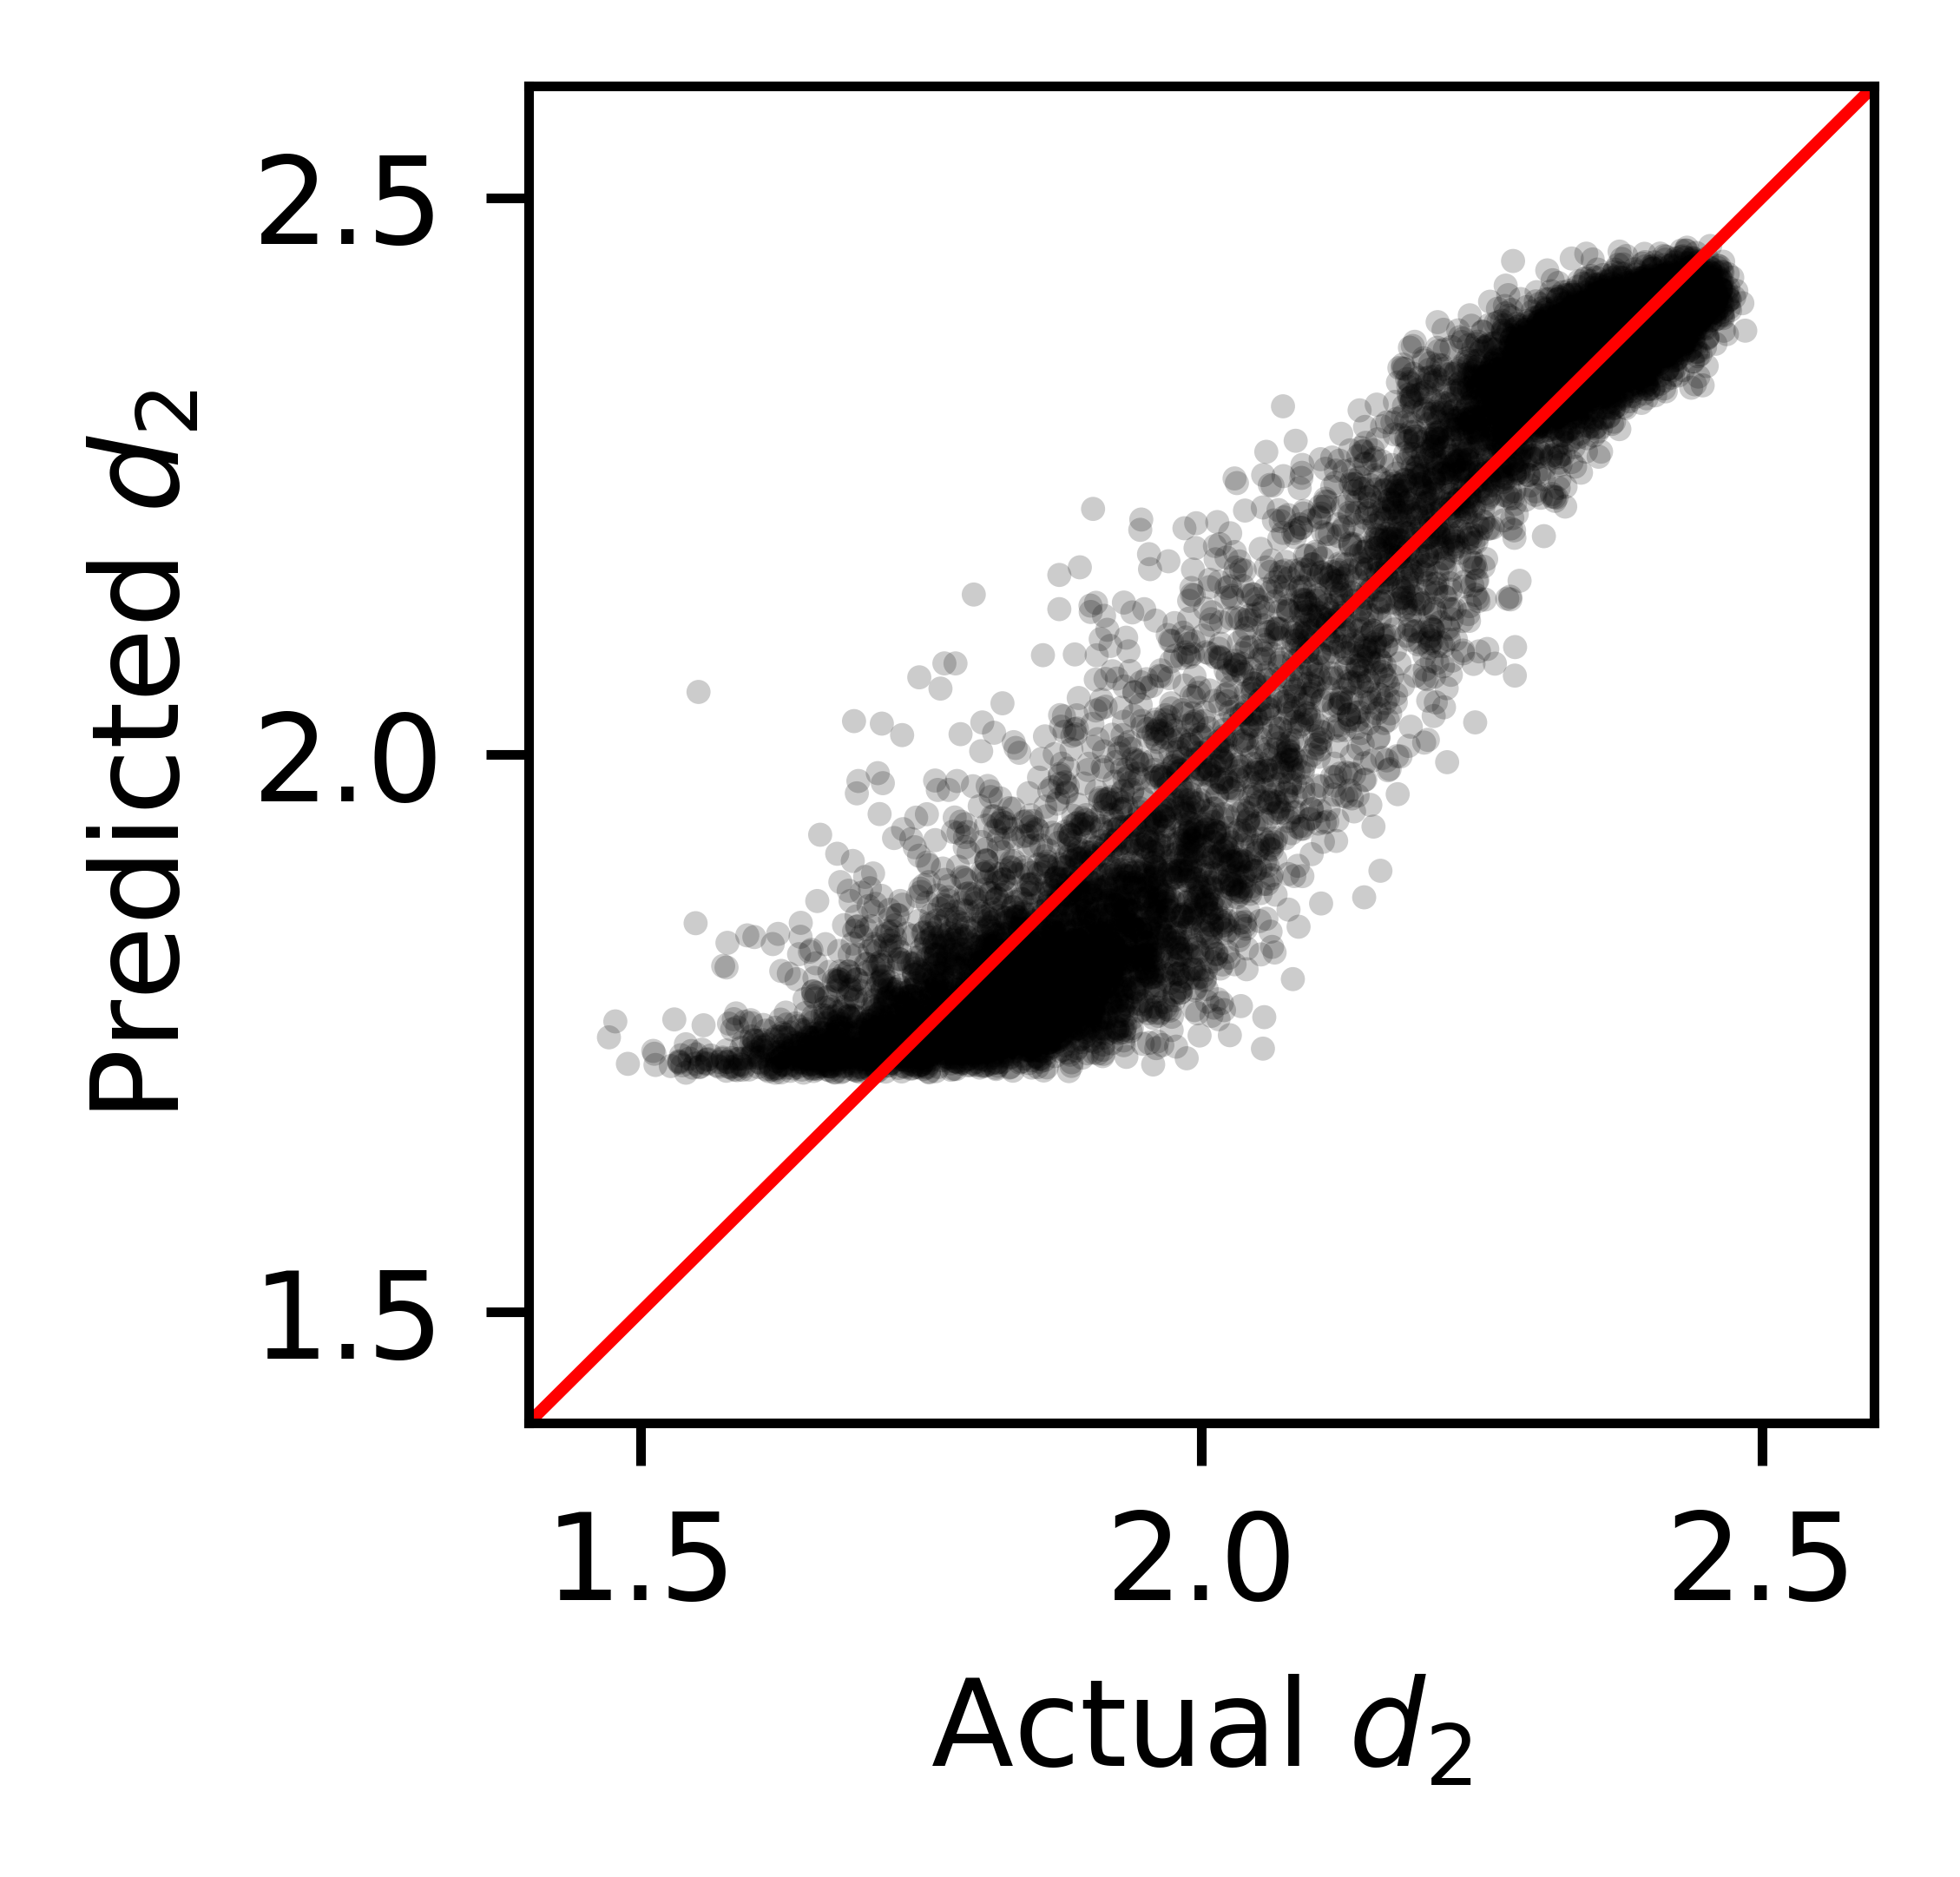

0.9194238293676695

In [2]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.scatter(test_labels, predicted_d2_3D, alpha=0.2, s=4, color='black', edgecolor='none')
plt.plot([min(test_labels)-1, max(test_labels)+1], [min(test_labels)-1, max(test_labels)+1], color="red", linestyle="-", lw=1)
plt.xlabel(r"Actual $d_2$")
plt.ylabel(r"Predicted $d_2$")

plt.xlim([1.4, 2.6])
plt.ylim([1.4, 2.6])
plt.xticks([1.5, 2.0, 2.5])
plt.yticks([1.5, 2.0, 2.5])
plt.show()


r_squared = r2_score(test_labels, predicted_d2_3D)
r_squared

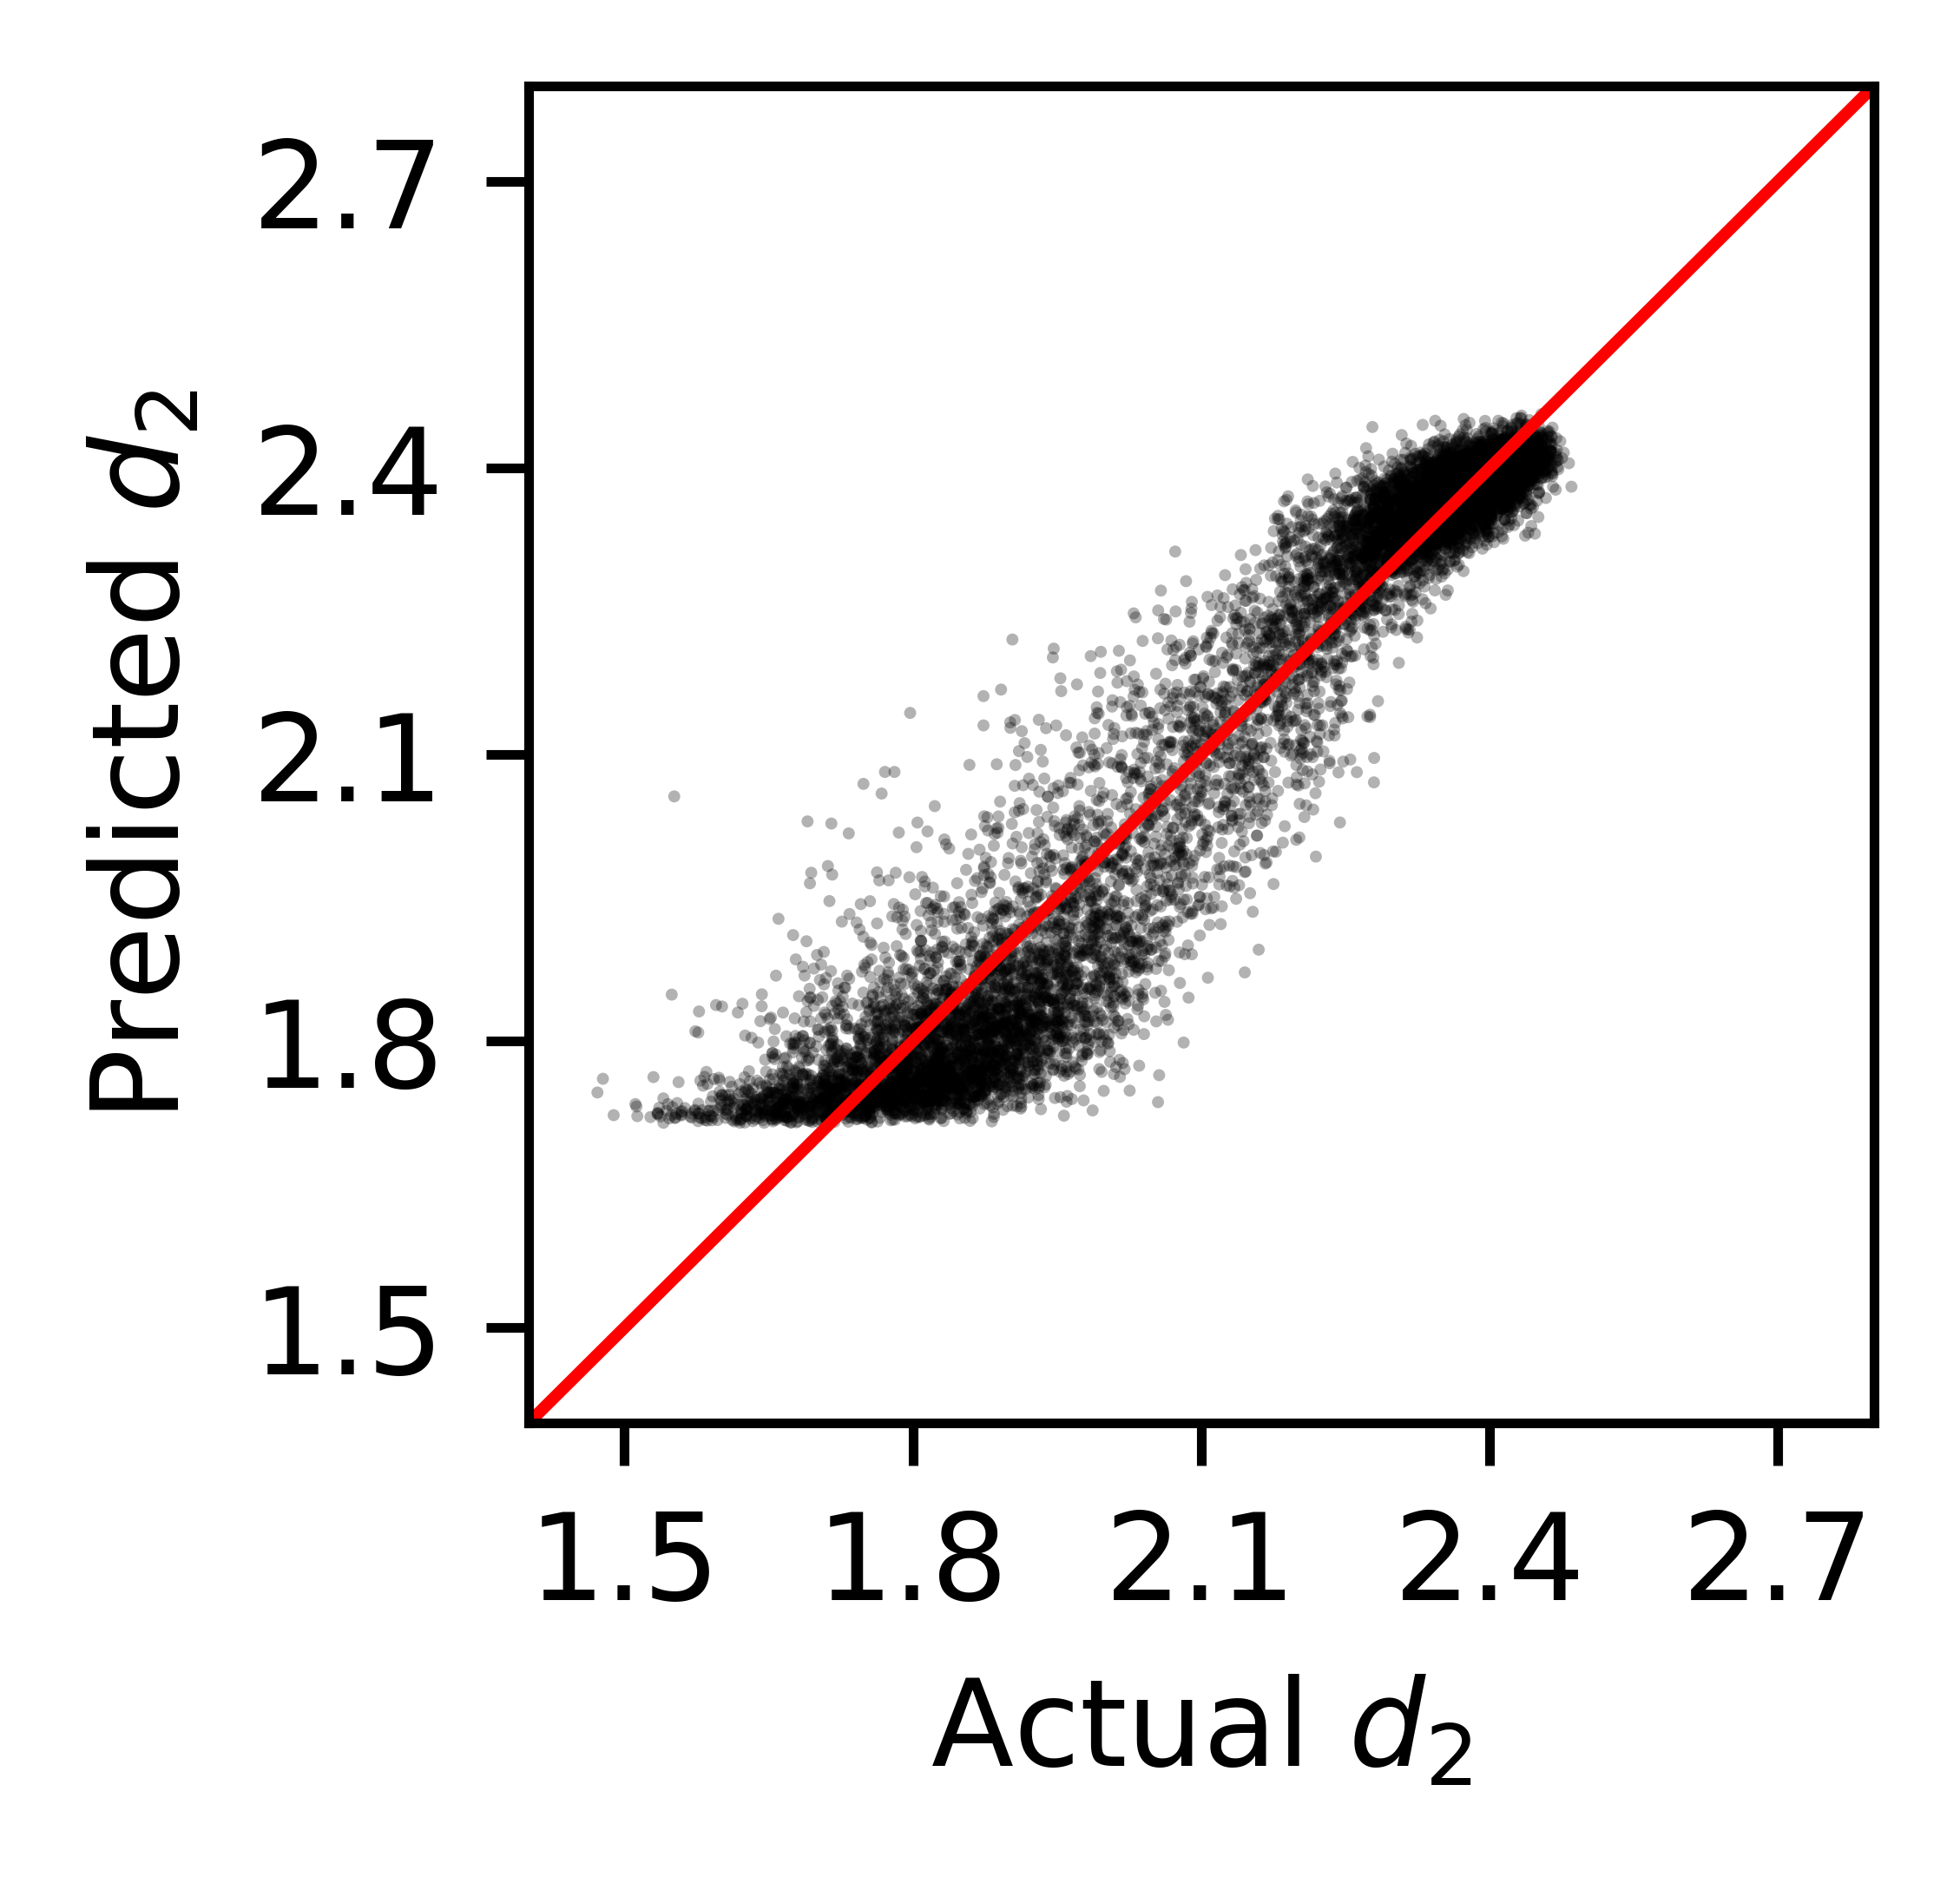

In [11]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.scatter(test_labels, predicted_d2_3D, alpha=0.3, s=1, color='black', edgecolor='none')
plt.plot([min(test_labels)-1, max(test_labels)+1], [min(test_labels)-1, max(test_labels)+1], color="red", linestyle="-", lw=1)
plt.xlabel(r"Actual $d_2$")
plt.ylabel(r"Predicted $d_2$")
plt.xlim([1.4,2.8])
plt.ylim([1.4,2.8])
plt.xticks([1.5, 1.8, 2.1,2.4,2.7])
plt.yticks([1.5, 1.8, 2.1,2.4,2.7])
plt.show()

In [12]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_labels - predicted_d2_3D))

# Calculate Mean Squared Error (MSE)
mse = np.mean((test_labels - predicted_d2_3D)**2)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

# Also calculate R² (since you were using it before)
r2 = r2_score(test_labels, predicted_d2_3D)
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0547
Mean Squared Error (MSE): 0.0053
Root Mean Square Error (RMSE): 0.0729
R² Score: 0.9194
